**Подготовлено Анастасией Щепанской**

**Задание**

На основании датасета “Appliances Energy Prediction” (https://archive.ics.uci.edu/ml/machine-learning-databases/00374/energydata_complete.csv) сделать модель для предсказания "Appliances" и "lights". Оценить работу модели

In [290]:
# Импорты
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_predict, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error, r2_score


Date time year- month-day hour:minute:second

Appliances- energy use in Wh

Lights- energy use of light fixtures in the house in Wh

T1- Temperature in kitchen area, in Celsius

RH_1- Humidity in kitchen area, in %

T2- Temperature in living room area, in Celsius

RH_2- Humidity in living room area, in %

T3- Temperature in laundry room area

RH_3- Humidity in laundry room area, in %

T4- Temperature in office room, in Celsius

RH_4- Humidity in office room, in %

T5- Temperature in bathroom, in Celsius

RH_5- Humidity in bathroom, in %

T6- Temperature outside the building (north side), in Celsius

RH_6- Humidity outside the building (north side), in %

T7- Temperature in ironing room , in Celsius

RH_7- Humidity in ironing room, in %

T8- Temperature in teenager room 2, in Celsius

RH_8- Humidity in teenager room 2, in %

T9- Temperature in parents room, in Celsius

RH_9- Humidity in parents room, in %

To- Temperature outside (from Chievres weather station), in Celsius

Pressure (from Chievres weather station)- in mm Hg

RH_out- Humidity outside (from Chievres weather station), in %

Wind speed (from Chievres weather station)- in m/s

Visibility (from Chievres weather station)- in km

Tdewpoint (from Chievres weather station)- Â°C

rv1- Random variable 1, nondimensional

rv2- Random variable 2, nondimensional

Почасовые данные (затем интерполированные) с ближайшей метеостанции аэропорта (аэропорт Кьевр, Бельгия) были загружены из общедоступного набора данных, предоставленного компанией Reliable Prognosis, rp5.ru. Компания Reliable Prognosis получила разрешение на распространение погодных данных за 4,5 месяца.

In [291]:
# Загрузка данных
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00374/energydata_complete.csv"
data = pd.read_csv(url)
data

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,...,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,...,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,...,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,...,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784


In [292]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

Пропусков в данных нет, столбец 'date' надо перевести в формат даты.

In [293]:
data['date'] = pd.to_datetime(data['date'])
data.date.info()

<class 'pandas.core.series.Series'>
RangeIndex: 19735 entries, 0 to 19734
Series name: date
Non-Null Count  Dtype         
--------------  -----         
19735 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 154.3 KB


In [319]:
data.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Tdewpoint,avg_T,NSM
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,22.029107,42.936165,19.485828,41.552401,7.411665,755.522602,79.750418,3.760707,20.815611,42907.129465
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,1.956162,5.224361,2.014712,4.151497,5.317409,7.399441,14.901088,4.194648,1.812567,24940.020831
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,16.306667,29.600000,14.890000,29.166667,-5.000000,729.300000,24.000000,-6.600000,16.012708,0.000000
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,20.790000,39.066667,18.000000,38.500000,3.666667,750.933333,70.333333,0.900000,19.663000,21600.000000
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,22.100000,42.375000,19.390000,40.900000,6.916667,756.100000,83.666667,3.433333,20.597500,43200.000000
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,23.390000,46.536000,20.600000,44.338095,10.408333,760.933333,91.666667,6.566667,21.764375,64200.000000
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,27.230000,58.780000,24.500000,53.326667,26.100000,772.300000,100.000000,15.500000,26.061940,85800.000000


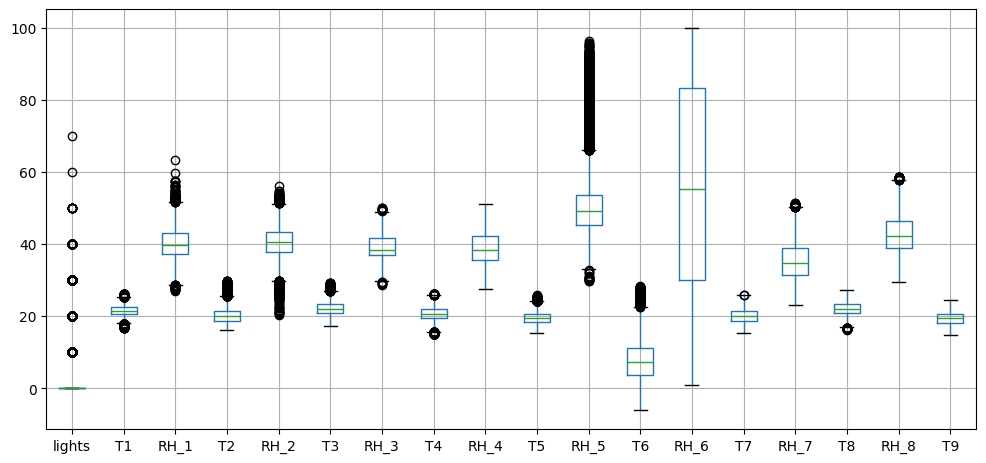

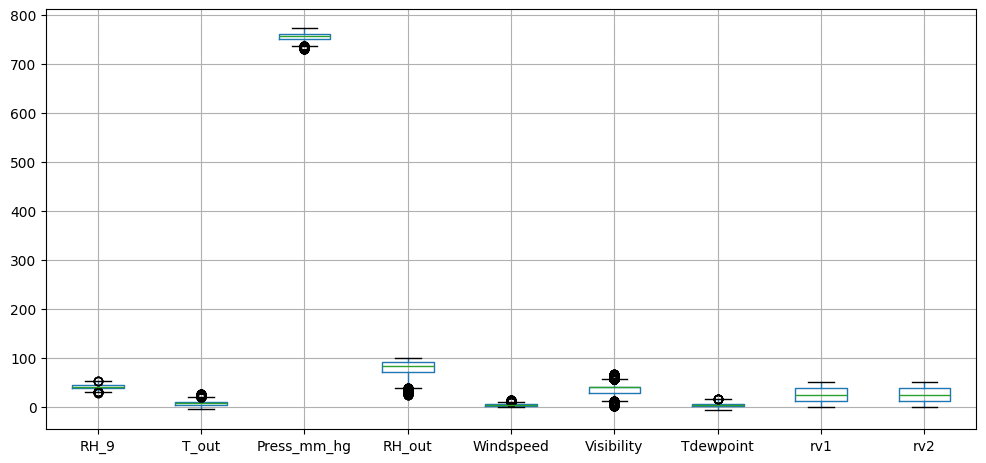

In [294]:
# Построим боксплоты для оценки выбросов
plt.figure(figsize=(12,12))
plt.subplot(2,1,1)
data.iloc[:,2:20].boxplot()
plt.show()

# боксплоты c 20й переменной
plt.figure(figsize=(12,12))
plt.subplot(2,1,2)
data.iloc[:,20:].boxplot()
plt.show()

В данных много выбросов

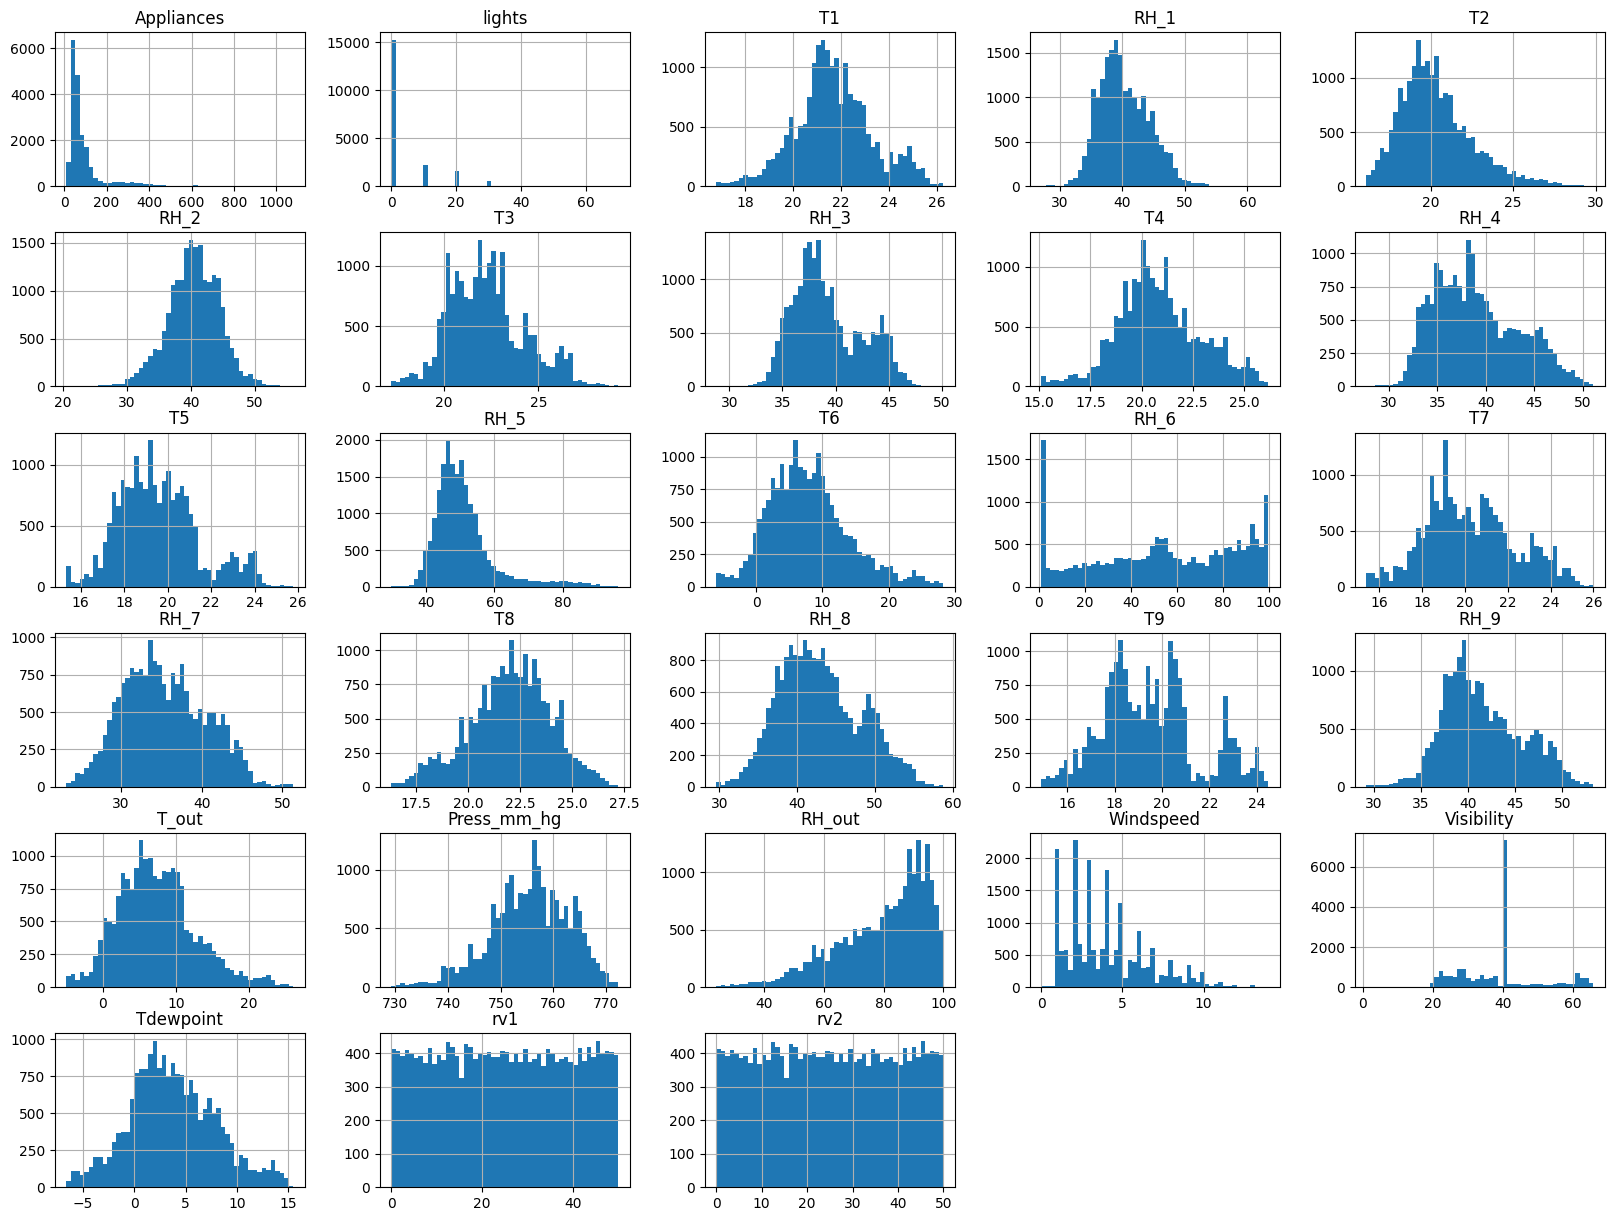

In [295]:
# Посмотрим распределения признаков и целевых переменных с помощью гистограмм
data.iloc[:,1:].hist(bins=50, figsize=(20,15))
plt.show()

Данные распределены в основном нормально

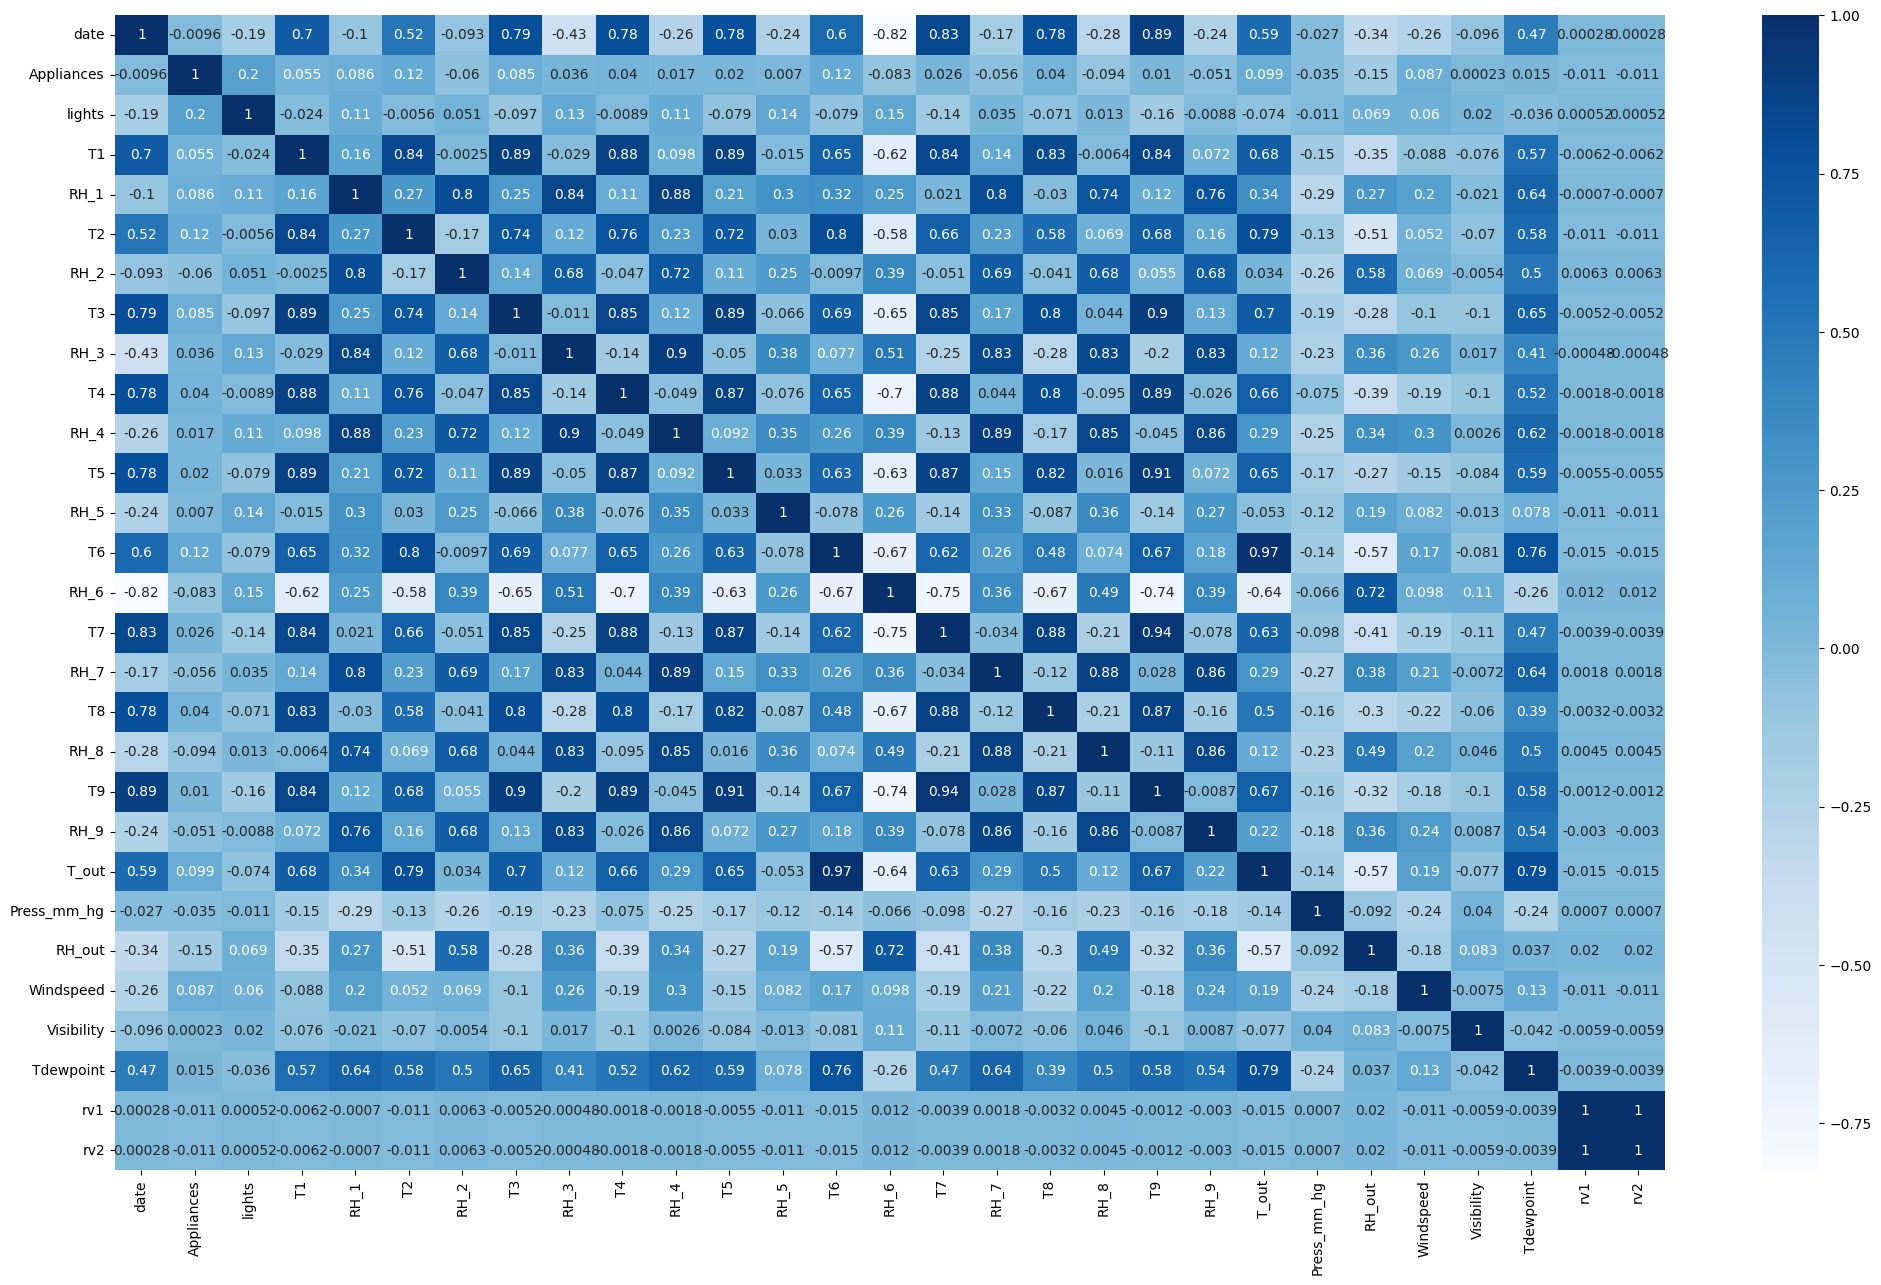

In [296]:
# Матрица корреляций

plt.figure(figsize=(25,15))
dataplot = sns.heatmap(data.corr(),annot=True, cmap="Blues")
plt.show()

Можно удалить столбцы, слабо влияющие на целевую переменную: rv1, rv2, Visibility, Windspeed

In [297]:
# Предобработка данных

# Удаляем ненужные столбцы
data = data.drop(columns=['rv1', 'rv2', 'Visibility', 'Windspeed'])


In [298]:
# Сконфигурируем новые признаки

# Вычисление средней температуры
data['avg_T'] = data[['T1', 'T2', 'T3', 'T4', 'T5', 'T7', 'T8', 'T9']].mean(axis=1)

# Вычислим количество секунд, прошедших с полуночи (NSM)
data['NSM'] = data['date'].dt.hour * 3600 + data['date'].dt.minute * 60 + data['date'].dt.second


# data = data.drop(columns=['date', 'T1', 'T2', 'T3', 'T4', 'T5', 'T7', 'T8', 'T9', 'RH_1', 'RH_2', 'RH_3', 'RH_4', 'RH_5', 'RH_7', 'RH_8', 'RH_9' ])
data = data.drop(columns=['date'])
data

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Tdewpoint,avg_T,NSM
0,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,...,18.2000,48.900000,17.033333,45.5300,6.600000,733.5,92.000000,5.300000,18.435000,61200
1,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,...,18.2000,48.863333,17.066667,45.5600,6.483333,733.6,92.000000,5.200000,18.439167,61800
2,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,...,18.2000,48.730000,17.000000,45.5000,6.366667,733.7,92.000000,5.100000,18.421667,62400
3,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,...,18.1000,48.590000,17.000000,45.4000,6.250000,733.8,92.000000,5.000000,18.396250,63000
4,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,...,18.1000,48.590000,17.000000,45.4000,6.133333,733.9,92.000000,4.900000,18.408750,63600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,45.590000,...,24.7000,50.074000,23.200000,46.7900,22.733333,755.2,55.666667,13.333333,24.869583,62400
19731,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,45.590000,...,24.7000,49.790000,23.200000,46.7900,22.600000,755.2,56.000000,13.300000,24.846810,63000
19732,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,45.730000,...,24.7000,49.660000,23.200000,46.7900,22.466667,755.2,56.333333,13.266667,24.818571,63600
19733,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,45.790000,...,24.6625,49.518750,23.200000,46.8175,22.333333,755.2,56.666667,13.233333,24.758312,64200


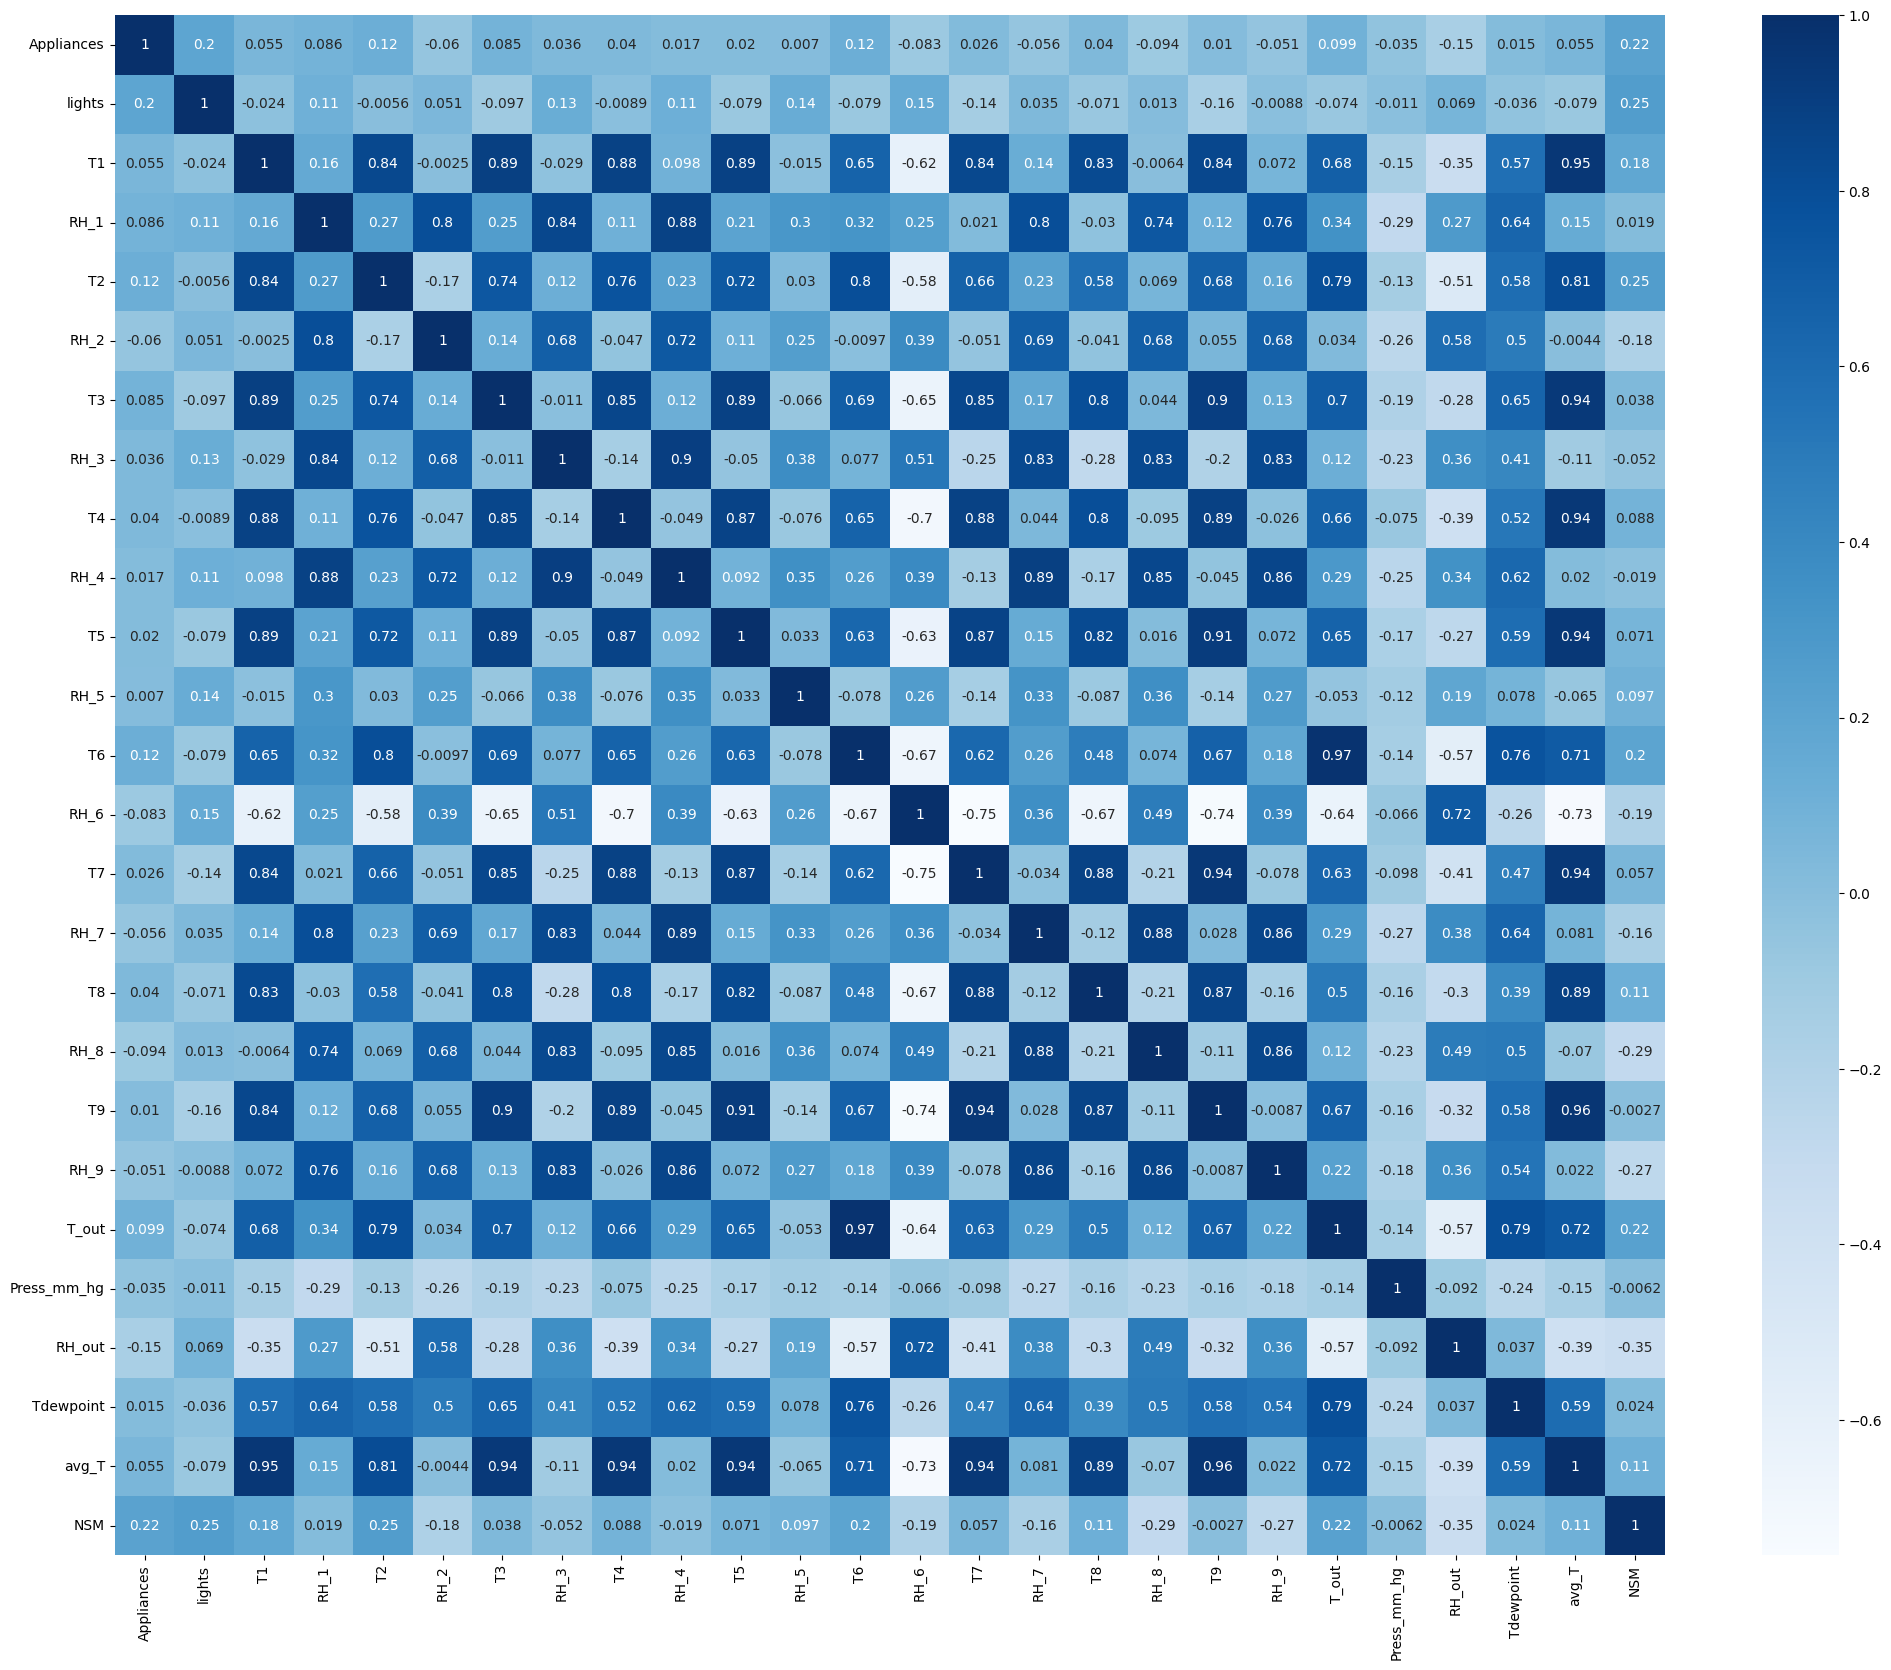

In [299]:
plt.figure(figsize=(25,20))
dataplot = sns.heatmap(data.corr(),annot=True, cmap="Blues")
plt.show()

На основе визуализации признаков, в качестве базовой модели выбрана
модель случайного леса **RandomForestRegressor**, она имеет следующие преимущества:

- Устойчивость к переобучению: Случайный лес менее подвержен переобучению благодаря множеству деревьев.

- Нелинейные зависимости: Может моделировать сложные нелинейные отношения между признаками и целевыми переменными.

- Важность признаков: Предоставляет информацию о важности признаков для интерпретации модели.

- Гибкость: Работает с числовыми и категориальными данными без строгих предположений о распределении.

In [300]:
# Разделяем данные на признаки и целевые переменные
X = data.drop(columns=['Appliances', 'lights'])
y = data[['Appliances', 'lights']]

In [301]:
# Разделяем данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание и обучение модели
# Используем RandomForestRegressor в качестве базовой модели
base_model = RandomForestRegressor(random_state=42)
model = MultiOutputRegressor(base_model)

# Определение параметров для подбора
param_grid = {
    'estimator__n_estimators': [100, 200, 300],
    'estimator__max_depth': [5, 8, 11, 14],
    'estimator__max_features': ['sqrt']
}

# Настройка GridSearchCV
grid_search = GridSearchCV(
    model, param_grid,
    cv=3,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

# Обучение модели
grid_search.fit(X_train, y_train)

# Вывод лучших параметров
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validated score: ", -grid_search.best_score_)

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best parameters found:  {'estimator__max_depth': 14, 'estimator__max_features': 'sqrt', 'estimator__n_estimators': 300}
Best cross-validated score:  2858.388787935581


In [303]:
# Получение предсказаний на тестовой выборке
y_pred = grid_search.predict(X_test)
y_pred

array([[ 48.75052773,   0.34393699],
       [133.86111669,  10.02620682],
       [ 50.71013171,   0.73768123],
       ...,
       [ 77.65911099,   0.70174474],
       [ 67.75564631,   1.40174679],
       [ 69.89662837,   0.1341833 ]])

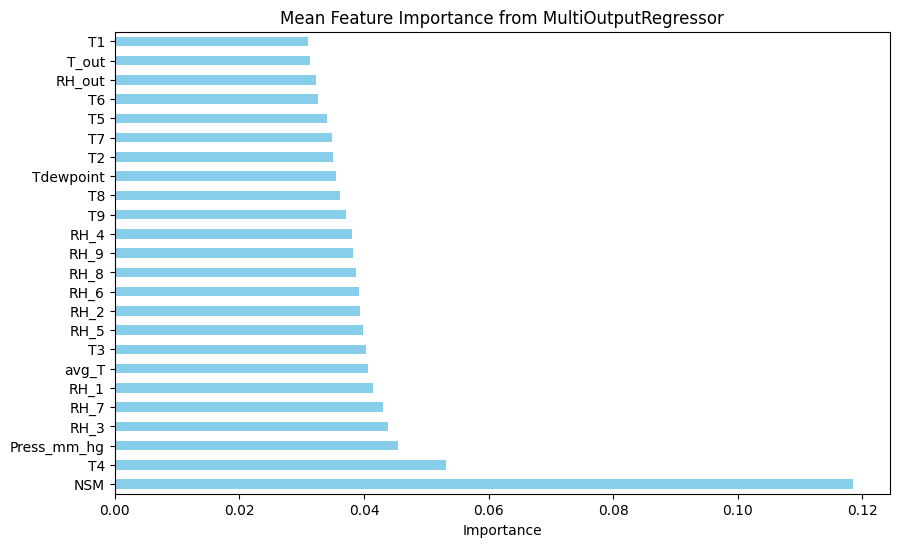

T1             0.031064
T_out          0.031346
RH_out         0.032351
T6             0.032577
T5             0.034058
T7             0.034945
T2             0.035093
Tdewpoint      0.035448
T8             0.036103
T9             0.037112
RH_4           0.038119
RH_9           0.038164
RH_8           0.038745
RH_6           0.039228
RH_2           0.039304
RH_5           0.039917
T3             0.040270
avg_T          0.040665
RH_1           0.041511
RH_7           0.043130
RH_3           0.043841
Press_mm_hg    0.045463
T4             0.053089
NSM            0.118455
dtype: float64


In [304]:
# Получение важности признаков для каждого регрессора
importances = [estimator.feature_importances_ for estimator in grid_search.best_estimator_.estimators_]

# Создание DataFrame для удобного отображения
feature_names = X.columns
importance_df = pd.DataFrame(importances, columns=feature_names)

# Средняя важность признаков по всем моделям
mean_importance = importance_df.mean(axis=0)

# Визуализация важности признаков
plt.figure(figsize=(10, 6))
mean_importance.sort_values(ascending=False).plot(kind='barh', color='skyblue')
plt.xlabel('Importance')
plt.title('Mean Feature Importance from MultiOutputRegressor')
plt.show()

# Вывод важности признаков
print(mean_importance.sort_values())


Видно, что созданный признак NSM оказался важным для предсказания.

In [318]:
# Вычисление метрик для 'Appliances'
mse_appliances = mean_squared_error(y_test['Appliances'], y_pred[:, 0])
r2_appliances = r2_score(y_test['Appliances'], y_pred[:, 0])

# Вычисление метрик для 'lights'
mse_lights = mean_squared_error(y_test['lights'], y_pred[:, 1])
r2_lights = r2_score(y_test['lights'], y_pred[:, 1])

# Вывод результатов
print("Metrics for 'Appliances':")
print(f"Mean Squared Error: {round(mse_appliances,1)}")
print(f"Root Mean Squared Error: {round(mse_appliances**0.5,1)}")
print(f"R² Score: {r2_appliances:.4}")

print("\nMetrics for 'lights':")
print(f"Mean Squared Error: {round(mse_lights, 1)}")
print(f"Root Mean Squared Error: {round(mse_lights**0.5,1)}")
print(f"R² Score: {r2_lights:.4}")


Metrics for 'Appliances':
Mean Squared Error: 4855.1
Root Mean Squared Error: 69.7
R² Score: 0.5148

Metrics for 'lights':
Mean Squared Error: 20.2
Root Mean Squared Error: 4.5
R² Score: 0.6703


**Выводы**

Для бытовых приборов "Appliances":

MSE: 4855.1 — значительные ошибки в предсказаниях.
RMSE: 69.7 — высокая средняя ошибка.
R² Score: 0.5148 — модель объясняет менее половины вариации, требуется улучшение.


Для освещения "lights":

MSE: 20.2 — значительно ниже, более точные предсказания.
RMSE: 4.5 — хорошая точность.
R² Score: 0.6703 — модель объясняет значительную часть вариации.
Важность признаков
Наиболее значимые переменные: NSM, T4, Press_mm_hg. Низкая важность других признаков может указывать на их незначительный вклад.

Рекомендации

Для "Appliances" улучшить модель, добавив новые признаки или изменив алгоритм.
Для "lights" провести дальнейший анализ для оптимизации.
Использовать анализ важности признаков для выбора значимых переменных.
